# Task 2

1.	Ваш код должен быть снабжен комментариями – преподаватель не должен догадываться – что имелось в виду.
2.	Выберите датасет из встроенного в seaborn для дальнейшего анализа (опционально – можно взять любые открытые данные, используя любой открытый репозиторий).
3.	Найдите описание датасета (о чем данные, где взят и т.п.) и данных (описание – что характеризует, тип) и добавьте в отчет. Изучение предметной области – немаловажный шаг для аналитика данных.
4.	Проверьте – есть ли отсутствующие данные, если есть – удалите.
5.	Используя различного рода визуализации проведите исследование данных: закономерности, зависимости, распределения. Снабдите каждый график необходимыми подписями (заголовок, оси, легенда и т.п.), выберите подходящую цветовую гамму. В качестве образца можно взять данную лабораторную работу. 
6.	По желанию можно добавить графики и диаграммы, не описанные в работе.
7.	По каждому графику должен быть вывод – что исследовано и что получено.
8.	Сделайте общий вывод по работе.


In [1]:
import polars as pl
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pyarrow

Motor Vehicle Collisions - Crashes (2012 - 2024)

https://www.kaggle.com/datasets/sahirmaharajj/motor-vehicle-collisions-crashes

The Motor Vehicle Collisions crash table contains details on the crash event. Each row represents a crash event. The Motor Vehicle Collisions data tables contain information from all police reported motor vehicle collisions in NYC. The police report (MV104-AN) is required to be filled out for collisions where someone is injured or killed, or where there is at least $1000 worth of damage.

In [2]:
df = pl.read_csv('../data/raw/nyc_motor_vehicle_collisions.csv')
df

CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
str,str,str,i64,f64,f64,str,str,str,str,i64,i64,i64,i64,i64,i64,i64,i64,str,str,str,str,str,i64,str,str,str,str,str
"""09/11/2021""","""2:39""",null,null,null,null,null,"""WHITESTONE EXP…","""20 AVENUE""",null,2,0,0,0,0,0,2,0,"""Aggressive Dri…","""Unspecified""",null,null,null,4455765,"""Sedan""","""Sedan""",null,null,null
"""03/26/2022""","""11:45""",null,null,null,null,null,"""QUEENSBORO BRI…",null,null,1,0,0,0,0,0,1,0,"""Pavement Slipp…",null,null,null,null,4513547,"""Sedan""",null,null,null,null
"""06/29/2022""","""6:55""",null,null,null,null,null,"""THROGS NECK BR…",null,null,0,0,0,0,0,0,0,0,"""Following Too …","""Unspecified""",null,null,null,4541903,"""Sedan""","""Pick-up Truck""",null,null,null
"""09/11/2021""","""9:35""","""BROOKLYN""",11208,40.667202,-73.8665,"""(40.667202, -7…",null,null,"""1211 LORI…",0,0,0,0,0,0,0,0,"""Unspecified""",null,null,null,null,4456314,"""Sedan""",null,null,null,null
"""12/14/2021""","""8:13""","""BROOKLYN""",11233,40.683304,-73.917274,"""(40.683304, -7…","""SARATOGA AVENU…","""DECATUR STREET…",null,0,0,0,0,0,0,0,0,null,null,null,null,null,4486609,null,null,null,null,null
"""04/14/2021""","""12:47""",null,null,null,null,null,"""MAJOR DEEGAN E…",null,null,0,0,0,0,0,0,0,0,"""Unspecified""","""Unspecified""",null,null,null,4407458,"""Dump""","""Sedan""",null,null,null
"""12/14/2021""","""17:05""",null,null,40.709183,-73.956825,"""(40.709183, -7…","""BROOKLYN QUEEN…",null,null,0,0,0,0,0,0,0,0,"""Passing Too Cl…","""Unspecified""",null,null,null,4486555,"""Sedan""","""Tractor Truck …",null,null,null
"""12/14/2021""","""8:17""","""BRONX""",10475,40.86816,-73.83148,"""(40.86816, -73…",null,null,"""344 BAYC…",2,0,0,0,0,0,2,0,"""Unspecified""","""Unspecified""",null,null,null,4486660,"""Sedan""","""Sedan""",null,null,null
"""12/14/2021""","""21:10""","""BROOKLYN""",11207,40.67172,-73.8971,"""(40.67172, -73…",null,null,"""2047 PITK…",0,0,0,0,0,0,0,0,"""Driver Inexper…","""Unspecified""",null,null,null,4487074,"""Sedan""",null,null,null,null


In [3]:
df.describe()

statistic,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
str,str,str,str,f64,f64,f64,str,str,str,str,f64,f64,f64,f64,f64,f64,f64,f64,str,str,str,str,str,f64,str,str,str,str,str
"""count""","""2076252""","""2076252""","""1430241""",1.429949e6,1.842564e6,1.842564e6,"""1842564""","""1635458""","""1291392""","""348421""",2.076234e6,2.076221e6,2.076252e6,2.076252e6,2.076252e6,2.076252e6,2.076252e6,2.076252e6,"""2069443""","""1754316""","""148349""","""33498""","""9075""",2.076252e6,"""2062556""","""1679316""","""142975""","""32334""","""8797"""
"""null_count""","""0""","""0""","""646011""",646303.0,233688.0,233688.0,"""233688""","""440794""","""784860""","""1727831""",18.0,31.0,0.0,0.0,0.0,0.0,0.0,0.0,"""6809""","""321936""","""1927903""","""2042754""","""2067177""",0.0,"""13696""","""396936""","""1933277""","""2043918""","""2067455"""
"""mean""",null,null,null,10841.520108,40.627423,-73.751636,null,null,null,null,0.309904,0.001495,0.056565,0.000741,0.026796,0.000115,0.222905,0.000616,null,null,null,null,null,3.1602e6,null,null,null,null,null
"""std""",null,null,null,553.830418,1.983412,3.728123,null,null,null,null,0.70005,0.040772,0.244111,0.027689,0.163492,0.010773,0.661185,0.027139,null,null,null,null,null,1.5052e6,null,null,null,null,null
"""min""","""01/01/2013""","""0:00""","""BRONX""",10000.0,0.0,-201.35999,"""(0.0, 0.0)""",""" …",""" …",""" …",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"""1""","""1""","""1""","""Accelerator De…","""Aggressive Dri…",22.0,"""''lime mope""","""(ceme""","""2 dr sedan""","""2 dr sedan""","""2 dr sedan"""
"""25%""",null,null,null,10308.0,40.667793,-73.97484,null,null,null,null,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,null,null,null,null,null,3.155183e6,null,null,null,null,null
"""50%""",null,null,null,11207.0,40.720826,-73.92726,null,null,null,null,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,null,null,null,null,null,3.674367e6,null,null,null,null,null
"""75%""",null,null,null,11237.0,40.769592,-73.866731,null,null,null,null,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,null,null,null,null,null,4.193676e6,null,null,null,null,null
"""max""","""12/31/2023""","""9:59""","""STATEN ISLAND""",11697.0,43.344444,0.0,"""(43.344444, -7…","""estfarms road…","""�ST 138 STREE…","""woodhaven boul…",43.0,8.0,27.0,6.0,4.0,2.0,43.0,5.0,"""Windshield Ina…","""Windshield Ina…","""View Obstructe…","""Windshield Ina…","""Unspecified""",4.713042e6,"""�MBU""","""yw""","""yello""","""van""","""van"""


In [4]:
df = df.select(
    [
        pl.concat_str(
            [
                pl.col('CRASH DATE'),
                pl.col('CRASH TIME')
            ],
            separator=' '
        ).str.to_datetime('%m/%d/%Y %H:%M').cast(pl.Datetime).alias('CRASH DATETIME'),
        pl.all().exclude(['CRASH DATE', 'CRASH TIME'])
    ]
)
df

CRASH DATETIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
datetime[μs],str,i64,f64,f64,str,str,str,str,i64,i64,i64,i64,i64,i64,i64,i64,str,str,str,str,str,i64,str,str,str,str,str
2021-09-11 02:39:00,null,null,null,null,null,"""WHITESTONE EXP…","""20 AVENUE""",null,2,0,0,0,0,0,2,0,"""Aggressive Dri…","""Unspecified""",null,null,null,4455765,"""Sedan""","""Sedan""",null,null,null
2022-03-26 11:45:00,null,null,null,null,null,"""QUEENSBORO BRI…",null,null,1,0,0,0,0,0,1,0,"""Pavement Slipp…",null,null,null,null,4513547,"""Sedan""",null,null,null,null
2022-06-29 06:55:00,null,null,null,null,null,"""THROGS NECK BR…",null,null,0,0,0,0,0,0,0,0,"""Following Too …","""Unspecified""",null,null,null,4541903,"""Sedan""","""Pick-up Truck""",null,null,null
2021-09-11 09:35:00,"""BROOKLYN""",11208,40.667202,-73.8665,"""(40.667202, -7…",null,null,"""1211 LORI…",0,0,0,0,0,0,0,0,"""Unspecified""",null,null,null,null,4456314,"""Sedan""",null,null,null,null
2021-12-14 08:13:00,"""BROOKLYN""",11233,40.683304,-73.917274,"""(40.683304, -7…","""SARATOGA AVENU…","""DECATUR STREET…",null,0,0,0,0,0,0,0,0,null,null,null,null,null,4486609,null,null,null,null,null
2021-04-14 12:47:00,null,null,null,null,null,"""MAJOR DEEGAN E…",null,null,0,0,0,0,0,0,0,0,"""Unspecified""","""Unspecified""",null,null,null,4407458,"""Dump""","""Sedan""",null,null,null
2021-12-14 17:05:00,null,null,40.709183,-73.956825,"""(40.709183, -7…","""BROOKLYN QUEEN…",null,null,0,0,0,0,0,0,0,0,"""Passing Too Cl…","""Unspecified""",null,null,null,4486555,"""Sedan""","""Tractor Truck …",null,null,null
2021-12-14 08:17:00,"""BRONX""",10475,40.86816,-73.83148,"""(40.86816, -73…",null,null,"""344 BAYC…",2,0,0,0,0,0,2,0,"""Unspecified""","""Unspecified""",null,null,null,4486660,"""Sedan""","""Sedan""",null,null,null
2021-12-14 21:10:00,"""BROOKLYN""",11207,40.67172,-73.8971,"""(40.67172, -73…",null,null,"""2047 PITK…",0,0,0,0,0,0,0,0,"""Driver Inexper…","""Unspecified""",null,null,null,4487074,"""Sedan""",null,null,null,null


In [5]:
df.describe()

statistic,CRASH DATETIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
str,str,str,f64,f64,f64,str,str,str,str,f64,f64,f64,f64,f64,f64,f64,f64,str,str,str,str,str,f64,str,str,str,str,str
"""count""","""2076252""","""1430241""",1.429949e6,1.842564e6,1.842564e6,"""1842564""","""1635458""","""1291392""","""348421""",2.076234e6,2.076221e6,2.076252e6,2.076252e6,2.076252e6,2.076252e6,2.076252e6,2.076252e6,"""2069443""","""1754316""","""148349""","""33498""","""9075""",2.076252e6,"""2062556""","""1679316""","""142975""","""32334""","""8797"""
"""null_count""","""0""","""646011""",646303.0,233688.0,233688.0,"""233688""","""440794""","""784860""","""1727831""",18.0,31.0,0.0,0.0,0.0,0.0,0.0,0.0,"""6809""","""321936""","""1927903""","""2042754""","""2067177""",0.0,"""13696""","""396936""","""1933277""","""2043918""","""2067455"""
"""mean""","""2017-07-20 12:…",null,10841.520108,40.627423,-73.751636,null,null,null,null,0.309904,0.001495,0.056565,0.000741,0.026796,0.000115,0.222905,0.000616,null,null,null,null,null,3.1602e6,null,null,null,null,null
"""std""",null,null,553.830418,1.983412,3.728123,null,null,null,null,0.70005,0.040772,0.244111,0.027689,0.163492,0.010773,0.661185,0.027139,null,null,null,null,null,1.5052e6,null,null,null,null,null
"""min""","""2012-07-01 00:…","""BRONX""",10000.0,0.0,-201.35999,"""(0.0, 0.0)""",""" …",""" …",""" …",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"""1""","""1""","""1""","""Accelerator De…","""Aggressive Dri…",22.0,"""''lime mope""","""(ceme""","""2 dr sedan""","""2 dr sedan""","""2 dr sedan"""
"""25%""","""2015-01-17 16:…",null,10308.0,40.667793,-73.97484,null,null,null,null,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,null,null,null,null,null,3.155183e6,null,null,null,null,null
"""50%""","""2017-05-15 09:…",null,11207.0,40.720826,-73.92726,null,null,null,null,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,null,null,null,null,null,3.674367e6,null,null,null,null,null
"""75%""","""2019-08-21 18:…",null,11237.0,40.769592,-73.866731,null,null,null,null,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,null,null,null,null,null,4.193676e6,null,null,null,null,null
"""max""","""2024-03-25 23:…","""STATEN ISLAND""",11697.0,43.344444,0.0,"""(43.344444, -7…","""estfarms road…","""�ST 138 STREE…","""woodhaven boul…",43.0,8.0,27.0,6.0,4.0,2.0,43.0,5.0,"""Windshield Ina…","""Windshield Ina…","""View Obstructe…","""Windshield Ina…","""Unspecified""",4.713042e6,"""�MBU""","""yw""","""yello""","""van""","""van"""


In [6]:
# import plotly.express as px
# fig = px.density_mapbox(df, lat='LATITUDE', lon='LONGITUDE', mapbox_style='open-street-map', radius=10)
# fig.show()

In [7]:
year_count = df.sort('CRASH DATETIME').group_by_dynamic('CRASH DATETIME', every='1y').agg(pl.len()).rename({'len': 'count'})
year_count

CRASH DATETIME,count
datetime[μs],u32
2012-01-01 00:00:00,100545
2013-01-01 00:00:00,203742
2014-01-01 00:00:00,206034
2015-01-01 00:00:00,217694
2016-01-01 00:00:00,229831
2017-01-01 00:00:00,231007
2018-01-01 00:00:00,231564
2019-01-01 00:00:00,211486
2020-01-01 00:00:00,112916


<Axes: xlabel='CRASH DATETIME', ylabel='count'>

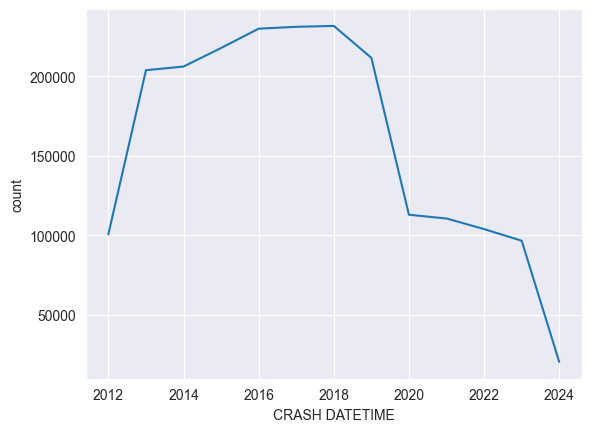

In [8]:
sns.lineplot(year_count, x='CRASH DATETIME', y='count')

In [9]:
month_count = df.sort('CRASH DATETIME').group_by_dynamic('CRASH DATETIME', every='1mo').agg(pl.len()).rename({'len': 'count'})
month_count

CRASH DATETIME,count
datetime[μs],u32
2012-07-01 00:00:00,16992
2012-08-01 00:00:00,17142
2012-09-01 00:00:00,16535
2012-10-01 00:00:00,16864
2012-11-01 00:00:00,15889
2012-12-01 00:00:00,17123
2013-01-01 00:00:00,15643
2013-02-01 00:00:00,14399
2013-03-01 00:00:00,16509


<Axes: xlabel='CRASH DATETIME', ylabel='count'>

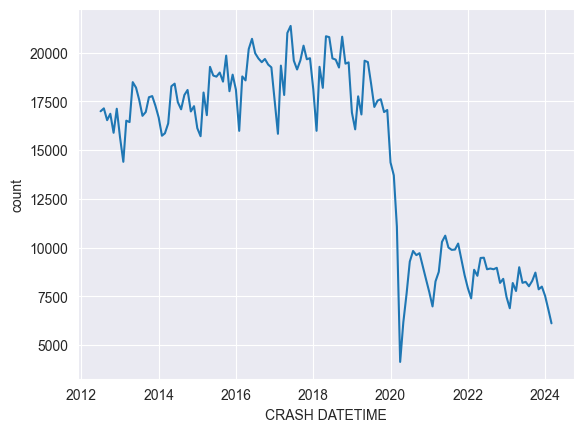

In [10]:
sns.lineplot(month_count, x='CRASH DATETIME', y='count')

([<matplotlib.patches.Wedge at 0x2b0021d19c0>,
 [Text(0.9199174110081191, 0.6031185264308496, 'QUEENS'),
  Text(-0.30206373750833987, 1.0577133347379586, 'BROOKLYN'),
  Text(-1.092142000760464, 0.13124728635263486, 'MANHATTAN'),
  Text(-0.2488820791740926, -1.0714745497052092, ''),
  Text(0.9644902771080973, -0.5289220220069739, 'BRONX'),
  Text(1.0954647684671714, -0.09978447297634448, 'STATEN ISLAND')],
 [Text(0.5017731332771558, 0.32897374168955434, '18.5%'),
  Text(-0.16476203864091266, 0.5769345462207046, '21.9%'),
  Text(-0.5957138185966168, 0.071589428919619, '15.4%'),
  Text(-0.13575386136768686, -0.5844406634755686, '31.1%'),
  Text(0.5260856056953257, -0.28850292109471304, '10.2%'),
  Text(0.5975262373457297, -0.05442789435073334, '2.9%')])

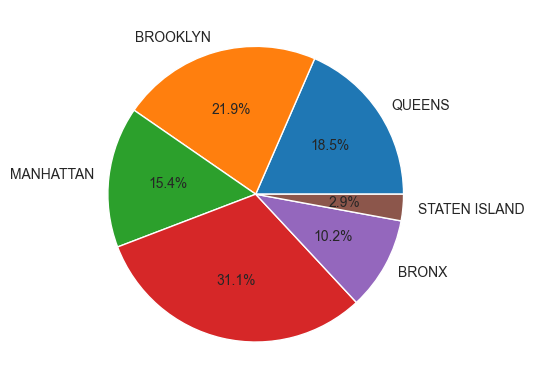

In [11]:
borough_count = df['BOROUGH'].value_counts()
plt.pie(borough_count['count'], labels=borough_count['BOROUGH'], autopct='%1.1f%%')
# borough_count

In [12]:
df.filter(pl.col('NUMBER OF PERSONS KILLED') == 0)

CRASH DATETIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
datetime[μs],str,i64,f64,f64,str,str,str,str,i64,i64,i64,i64,i64,i64,i64,i64,str,str,str,str,str,i64,str,str,str,str,str
2021-09-11 02:39:00,null,null,null,null,null,"""WHITESTONE EXP…","""20 AVENUE""",null,2,0,0,0,0,0,2,0,"""Aggressive Dri…","""Unspecified""",null,null,null,4455765,"""Sedan""","""Sedan""",null,null,null
2022-03-26 11:45:00,null,null,null,null,null,"""QUEENSBORO BRI…",null,null,1,0,0,0,0,0,1,0,"""Pavement Slipp…",null,null,null,null,4513547,"""Sedan""",null,null,null,null
2022-06-29 06:55:00,null,null,null,null,null,"""THROGS NECK BR…",null,null,0,0,0,0,0,0,0,0,"""Following Too …","""Unspecified""",null,null,null,4541903,"""Sedan""","""Pick-up Truck""",null,null,null
2021-09-11 09:35:00,"""BROOKLYN""",11208,40.667202,-73.8665,"""(40.667202, -7…",null,null,"""1211 LORI…",0,0,0,0,0,0,0,0,"""Unspecified""",null,null,null,null,4456314,"""Sedan""",null,null,null,null
2021-12-14 08:13:00,"""BROOKLYN""",11233,40.683304,-73.917274,"""(40.683304, -7…","""SARATOGA AVENU…","""DECATUR STREET…",null,0,0,0,0,0,0,0,0,null,null,null,null,null,4486609,null,null,null,null,null
2021-04-14 12:47:00,null,null,null,null,null,"""MAJOR DEEGAN E…",null,null,0,0,0,0,0,0,0,0,"""Unspecified""","""Unspecified""",null,null,null,4407458,"""Dump""","""Sedan""",null,null,null
2021-12-14 17:05:00,null,null,40.709183,-73.956825,"""(40.709183, -7…","""BROOKLYN QUEEN…",null,null,0,0,0,0,0,0,0,0,"""Passing Too Cl…","""Unspecified""",null,null,null,4486555,"""Sedan""","""Tractor Truck …",null,null,null
2021-12-14 08:17:00,"""BRONX""",10475,40.86816,-73.83148,"""(40.86816, -73…",null,null,"""344 BAYC…",2,0,0,0,0,0,2,0,"""Unspecified""","""Unspecified""",null,null,null,4486660,"""Sedan""","""Sedan""",null,null,null
2021-12-14 21:10:00,"""BROOKLYN""",11207,40.67172,-73.8971,"""(40.67172, -73…",null,null,"""2047 PITK…",0,0,0,0,0,0,0,0,"""Driver Inexper…","""Unspecified""",null,null,null,4487074,"""Sedan""",null,null,null,null


In [13]:
df.to_pandas()

SyntaxError: invalid syntax (944637146.py, line 1)